In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**LECTURA DEL DATASET Y COMPROBACIÓN DE NULOS**

In [45]:
data = pd.read_excel('Detalle precios y productos fabricados 2022.xlsx')

In [46]:
valores_nulos=data.isnull().sum().sum()
valores_nulos

np.int64(2)

In [47]:
valores_nulos=data.isnull().sum()
valores_nulos

CVE_DOC                      0
FECHA_DOC                    0
NOMBRE_VENDEDOR              2
NOMBRE_CLIENTE               0
CANT                         0
CVE_ART                      0
DESCR                        0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CVE_DOC                    1426 non-null   object        
 1   FECHA_DOC                  1426 non-null   datetime64[ns]
 2   NOMBRE_VENDEDOR            1424 non-null   object        
 3   NOMBRE_CLIENTE             1426 non-null   object        
 4   CANT                       1426 non-null   int64         
 5   CVE_ART                    1426 non-null   object        
 6   DESCR                      1426 non-null   object        
 7   PRECIO_UNITARIO            1426 non-null   float64       
 8   COSTO_UNITARIO             1426 non-null   float64       
 9   COSTO_UNITARIO_CALCULADO   1426 non-null   float64       
 10  SUBTOTAL_PARTIDA           1426 non-null   float64       
 11  COSTO_TOTAL_CALCULADO      1426 non-null   float64       
 12  MARGEN

**CREACIÓN DEL DATAFRAME A TRABAJAR Y TRATAMIENTO DE VALORES NULOS**

In [49]:
data1=data.copy()
data1

,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CANT,CVE_ART,DESCR,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,F37034,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,1,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,F37036,2022-01-05,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,1,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,F37041,2022-01-05,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,7,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,F37042,2022-01-05,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,1,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,2,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,6,CS12F1040A00,"CAS INOX 1/2""ØX3"" 400W 127V EXT.30CM",712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,6,CS12H1050A00,"CAS INOX 1/2""ØX4"" 500W 127V EXT30CM",718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,F39835,2022-12-23,LETICIA RAMIREZ HERNANDEZ,SEVEN DAYS ALL SPORT,3,TUE00394,"TUB INOX 5/16""ØX300MM 5300W 220V ""M"" ESP",2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,F39837,2022-12-23,LETICIA RAMIREZ HERNANDEZ,REVUELTA MONTECARLO,1,TUA00470,"TUB INOX 1/2""ØX500MM 10KW 220V 2 1/2""NPT",5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


In [50]:
data1['NOMBRE_VENDEDOR']=data1['NOMBRE_VENDEDOR'].fillna('en espera del dato')

valores_nulos=data1.isnull().sum().sum()
valores_nulos

np.int64(0)

**INICIA EL TRATAMIENTO DE VALORES ATÍPICOS**

In [51]:
#cREACIÓN DE DOS DATAFRAMES PARA PROCESAR OUTLIERS

cualitativas= data1.iloc[ : , [0, 1, 2, 3, 5, 6]]
cuantitativas = data1.select_dtypes(include=['float', 'int'])


In [52]:
cualitativas

,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CVE_ART,DESCR
0,F37034,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V"
1,F37036,2022-01-05,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT"
2,F37041,2022-01-05,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT
3,F37042,2022-01-05,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT
4,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR
...,...,...,...,...,...,...
1421,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12F1040A00,"CAS INOX 1/2""ØX3"" 400W 127V EXT.30CM"
1422,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12H1050A00,"CAS INOX 1/2""ØX4"" 500W 127V EXT30CM"
1423,F39835,2022-12-23,LETICIA RAMIREZ HERNANDEZ,SEVEN DAYS ALL SPORT,TUE00394,"TUB INOX 5/16""ØX300MM 5300W 220V ""M"" ESP"
1424,F39837,2022-12-23,LETICIA RAMIREZ HERNANDEZ,REVUELTA MONTECARLO,TUA00470,"TUB INOX 1/2""ØX500MM 10KW 220V 2 1/2""NPT"


In [53]:
cuantitativas

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


**DIAGRAMAS DE CAJA O BIGOTE DE CADA COLUMNA DEL DATAFRAME**

<Figure size 1500x800 with 0 Axes>

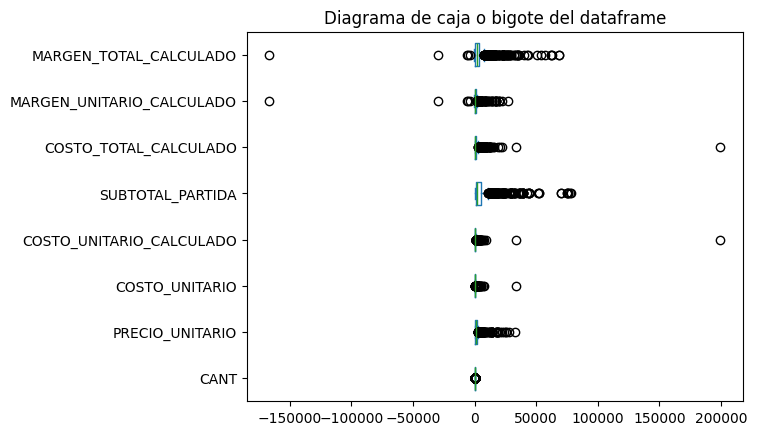

In [54]:
fig = plt.figure(figsize=(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title('Diagrama de caja o bigote del dataframe')
plt.show()

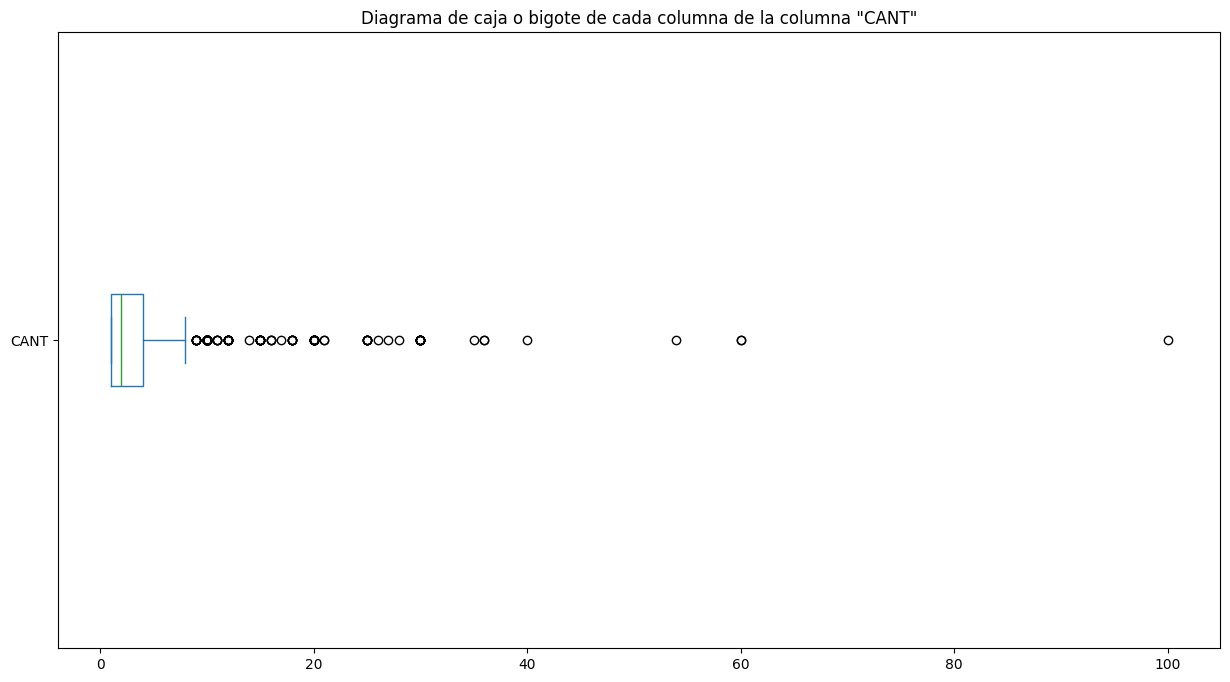

In [55]:
fig = plt.figure(figsize=(15, 8))
cuantitativas['CANT'].plot(kind='box', vert=False)
plt.title('Diagrama de caja o bigote de cada columna de la columna "CANT"')
plt.show()

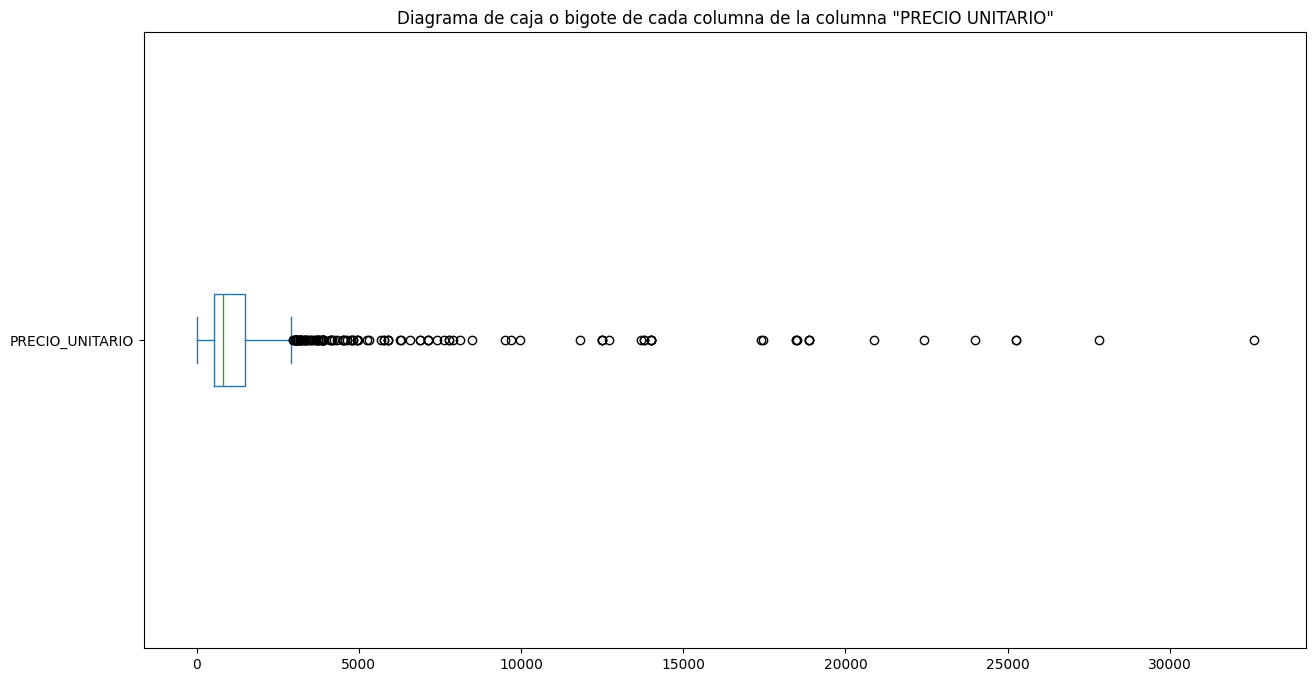

In [56]:
fig = plt.figure(figsize=(15, 8))
cuantitativas['PRECIO_UNITARIO'].plot(kind='box', vert=False)
plt.title('Diagrama de caja o bigote de cada columna de la columna "PRECIO UNITARIO"')
plt.show()

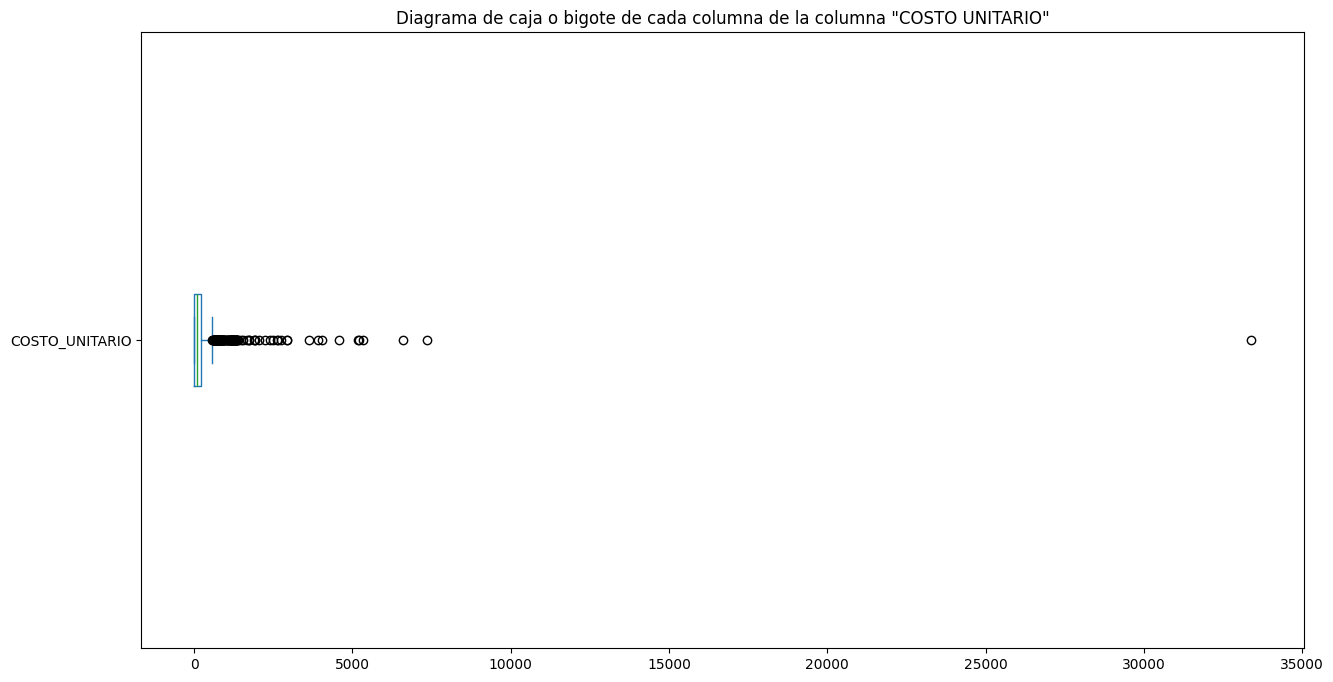

In [57]:
fig = plt.figure(figsize=(15, 8))
cuantitativas['COSTO_UNITARIO'].plot(kind='box', vert=False)
plt.title('Diagrama de caja o bigote de cada columna de la columna "COSTO UNITARIO"')
plt.show()

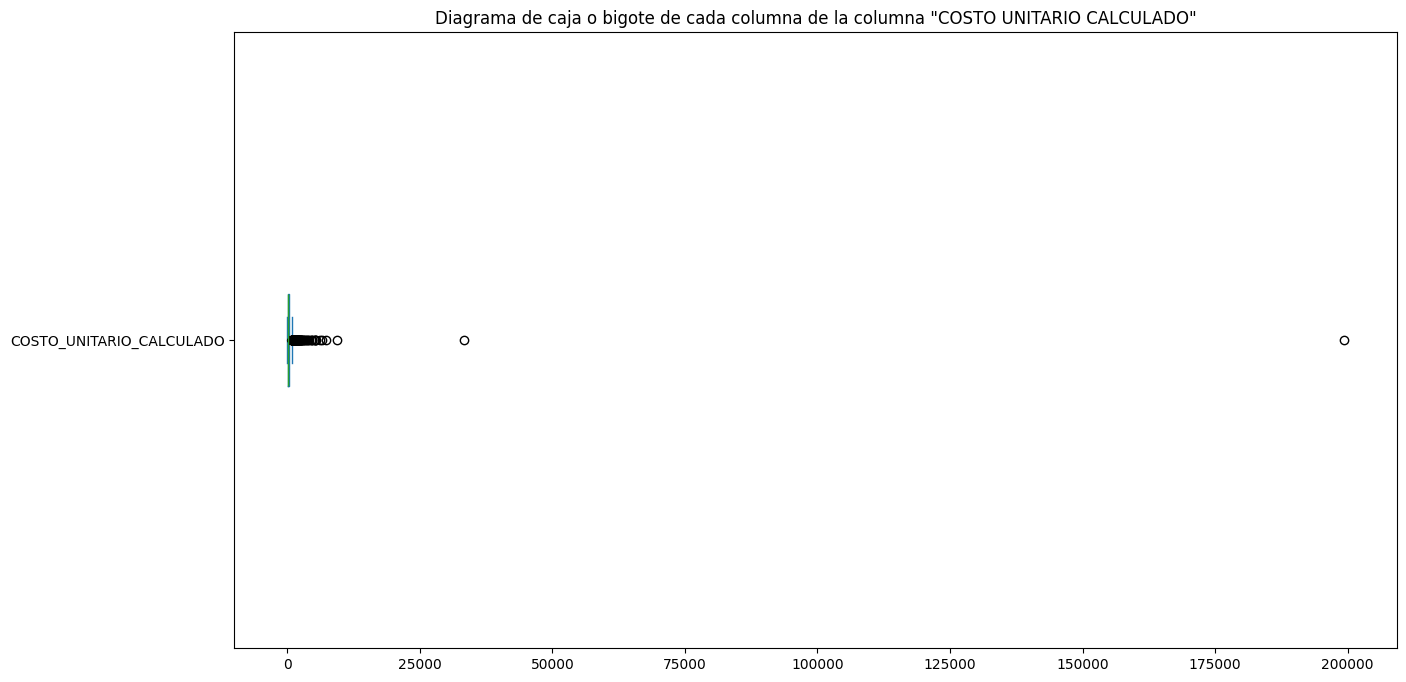

In [58]:
fig = plt.figure(figsize=(15, 8))
cuantitativas['COSTO_UNITARIO_CALCULADO'].plot(kind='box', vert=False)
plt.title('Diagrama de caja o bigote de cada columna de la columna "COSTO UNITARIO CALCULADO"')
plt.show()

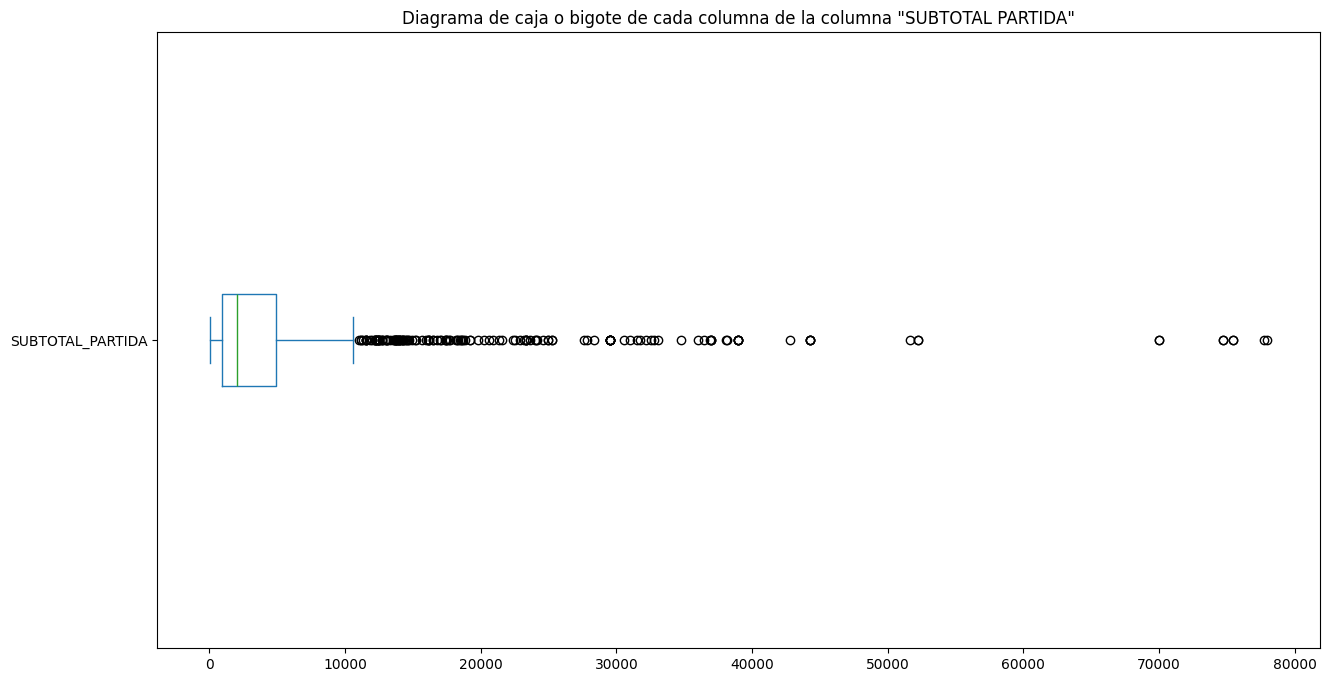

In [59]:
fig = plt.figure(figsize=(15, 8))
cuantitativas['SUBTOTAL_PARTIDA'].plot(kind='box', vert=False)
plt.title('Diagrama de caja o bigote de cada columna de la columna "SUBTOTAL PARTIDA"')
plt.show()

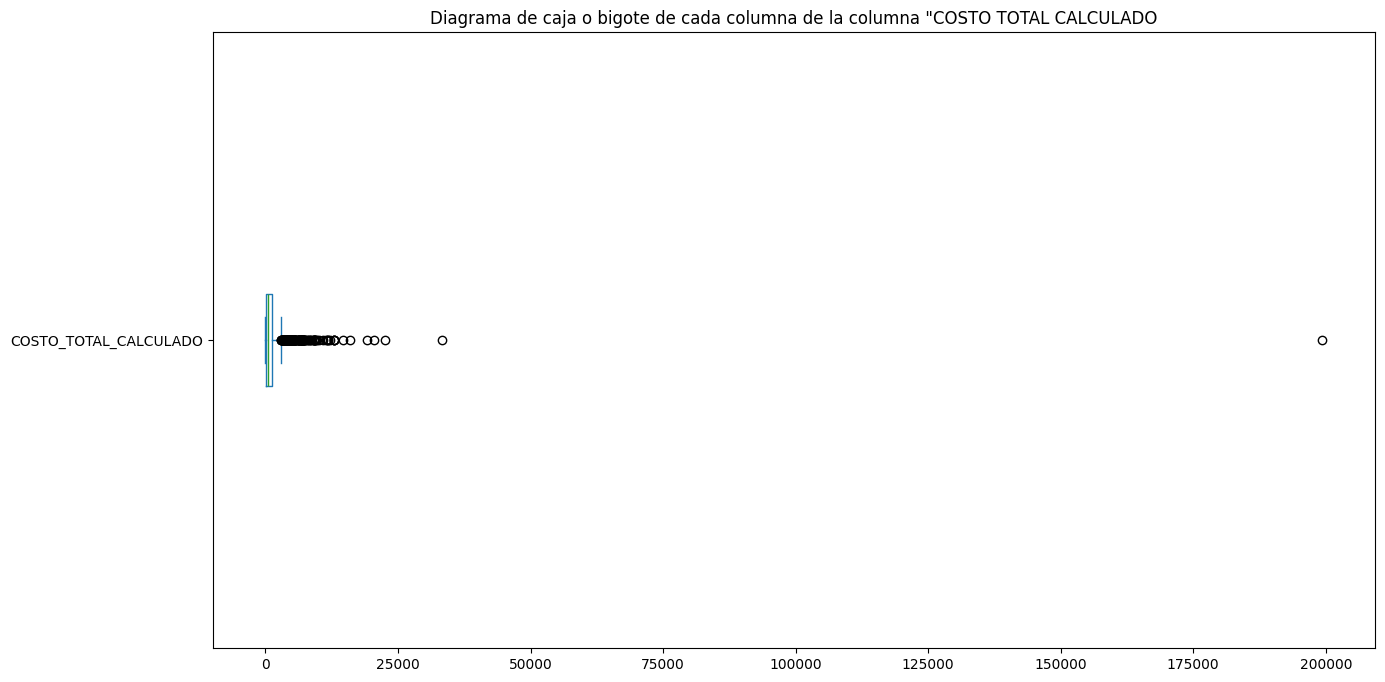

In [60]:
fig = plt.figure(figsize=(15, 8))
cuantitativas['COSTO_TOTAL_CALCULADO'].plot(kind='box', vert=False)
plt.title('Diagrama de caja o bigote de cada columna de la columna "COSTO TOTAL CALCULADO')
plt.show()

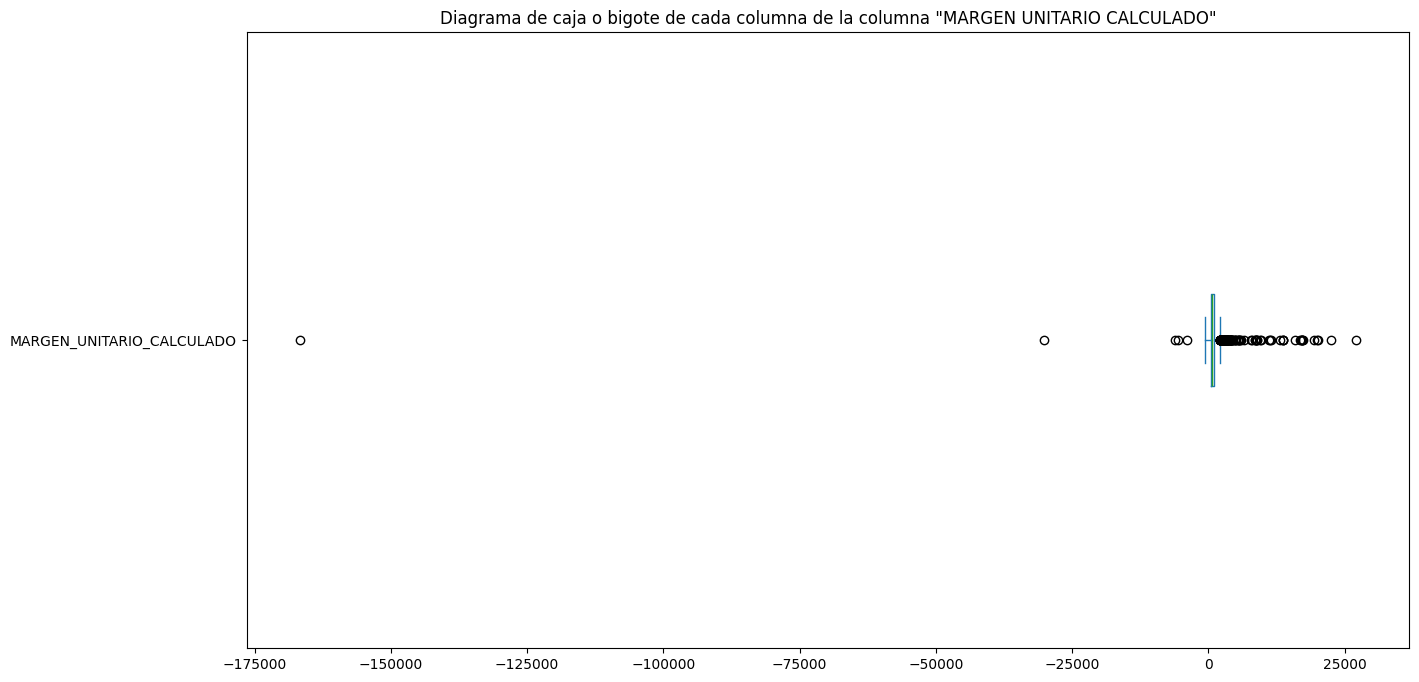

In [61]:
fig = plt.figure(figsize=(15, 8))
cuantitativas['MARGEN_UNITARIO_CALCULADO'].plot(kind='box', vert=False)
plt.title('Diagrama de caja o bigote de cada columna de la columna "MARGEN UNITARIO CALCULADO"')
plt.show()

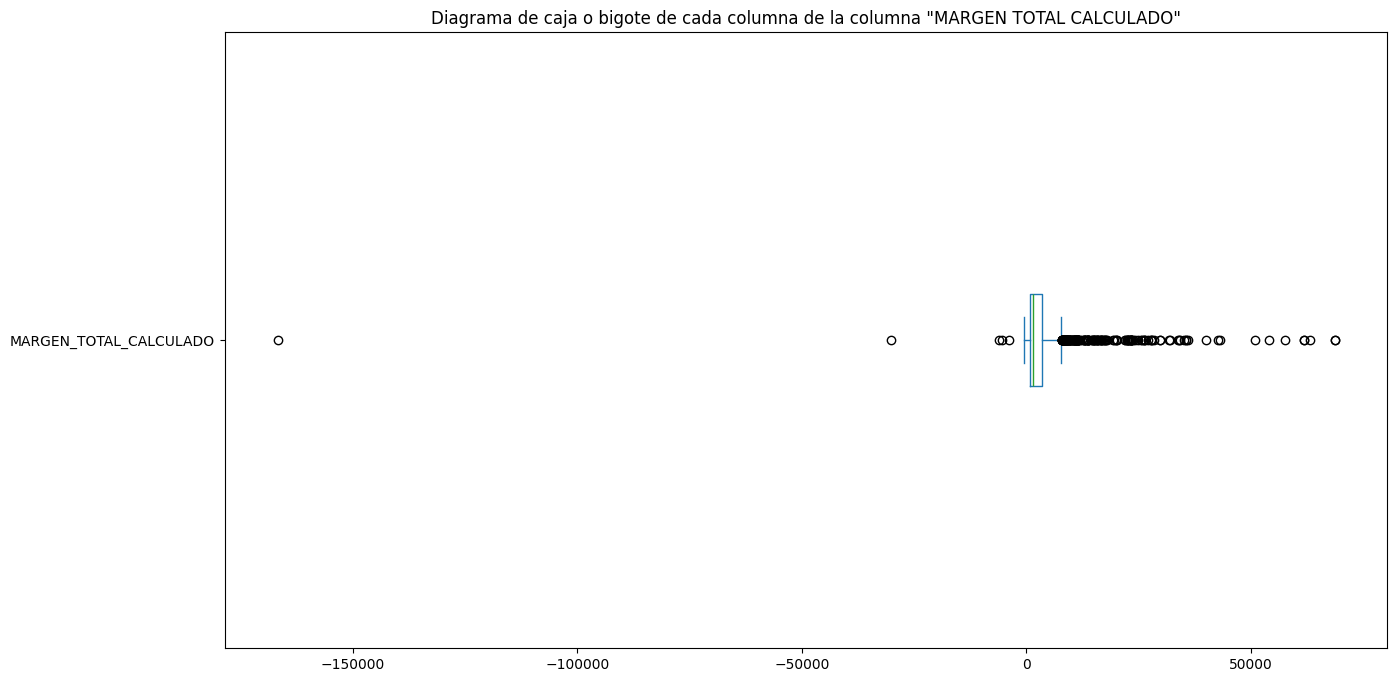

In [62]:
fig = plt.figure(figsize=(15, 8))
cuantitativas['MARGEN_TOTAL_CALCULADO'].plot(kind='box', vert=False)
plt.title('Diagrama de caja o bigote de cada columna de la columna "MARGEN TOTAL CALCULADO"')
plt.show()

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINACIÓN DE OUTLIERS EN DATAFRAME**

Límite superior permitido CANT                            22.531793
PRECIO_UNITARIO               9533.970813
COSTO_UNITARIO                3313.473534
COSTO_UNITARIO_CALCULADO     16686.790475
SUBTOTAL_PARTIDA             31402.663810
COSTO_TOTAL_CALCULADO        18629.377526
MARGEN_UNITARIO_CALCULADO    16001.398440
MARGEN_TOTAL_CALCULADO       28691.369713
dtype: float64
Límite inferior permitido CANT                           -14.324219
PRECIO_UNITARIO              -6499.204684
COSTO_UNITARIO               -2821.614250
COSTO_UNITARIO_CALCULADO    -15603.765678
SUBTOTAL_PARTIDA            -21404.897036
COSTO_TOTAL_CALCULADO       -15803.336348
MARGEN_UNITARIO_CALCULADO   -14049.656995
MARGEN_TOTAL_CALCULADO      -21519.643893
dtype: float64


In [64]:
data2=cuantitativas [(y<=Limite_Superior)&(y>=Limite_Inferior)]
data2

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


In [65]:
valores_nulos1= data2.isnull().sum()
valores_nulos1

CANT                         28
PRECIO_UNITARIO              29
COSTO_UNITARIO               10
COSTO_UNITARIO_CALCULADO      2
SUBTOTAL_PARTIDA             36
COSTO_TOTAL_CALCULADO         5
MARGEN_UNITARIO_CALCULADO    13
MARGEN_TOTAL_CALCULADO       24
dtype: int64

In [66]:
data_clean=data2.copy()
data_clean=data_clean.fillna(round(data2.mean(),1))
data_clean

valores_nulos = data_clean.isnull().sum().sum()
valores_nulos

np.int64(0)

**PROCEDIMIENTO "CUARTILES" PARA CALCULAR
OUTLIERS**

In [67]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75

y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q1
iqr=percentile75-percentile25

Limite_Superior_iqr=percentile75 + 1.5*iqr
Limite_Inferior_iqr=percentile25 + 1.5*iqr

In [68]:
#Obtenemos datos limpios del Dataframe

df3_iqr=cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3_iqr

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1421,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1422,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1423,NaN,2182.35,NaN,596.55,NaN,NaN,1585.8,NaN
1424,NaN,NaN,NaN,NaN,NaN,1884.35,NaN,NaN


In [69]:
valores_nulos=df3_iqr.isnull().sum()
valores_nulos

CANT                         1310
PRECIO_UNITARIO              1303
COSTO_UNITARIO               1333
COSTO_UNITARIO_CALCULADO     1320
SUBTOTAL_PARTIDA             1324
COSTO_TOTAL_CALCULADO        1336
MARGEN_UNITARIO_CALCULADO    1311
MARGEN_TOTAL_CALCULADO       1333
dtype: int64

In [70]:
valores_nulos=df3_iqr.isnull().sum().sum()
valores_nulos

np.int64(10570)

In [71]:
data_clean_iqr=data2.copy()
data_clean_iqr=data_clean.fillna(round(data2.mean(),1))
data_clean_iqr

valores_nulos=data_clean_iqr.isnull().sum().sum()
valores_nulos

np.int64(0)

In [72]:
#Union del dataframe cuantitativo con el cualitativo 

Datos_limpios = pd.concat([cualitativas, data_clean_iqr], axis=1)
Datos_limpios

,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CVE_ART,DESCR,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,F37034,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,F37036,2022-01-05,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,F37041,2022-01-05,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,F37042,2022-01-05,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12F1040A00,"CAS INOX 1/2""ØX3"" 400W 127V EXT.30CM",6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12H1050A00,"CAS INOX 1/2""ØX4"" 500W 127V EXT30CM",6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,F39835,2022-12-23,LETICIA RAMIREZ HERNANDEZ,SEVEN DAYS ALL SPORT,TUE00394,"TUB INOX 5/16""ØX300MM 5300W 220V ""M"" ESP",3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,F39837,2022-12-23,LETICIA RAMIREZ HERNANDEZ,REVUELTA MONTECARLO,TUA00470,"TUB INOX 1/2""ØX500MM 10KW 220V 2 1/2""NPT",1.0,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


In [73]:
Datos_limpios.to_csv('Datos_Limpios.csv')